In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
import plotly.express as px


In [2]:
# set global parameters

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid', {'grid.color':'red'})

In [3]:
df = pd.read_csv('./Data/media prediction and its cost.csv')

In [4]:
df = df.rename(columns={'store_sales(in millions)':'store_sales',
                   'store_cost(in millions)':'store_cost',
                   'unit_sales(in millions)':'unit_sales',
                   'avg_cars_at home(approx)':'avg_cars_at_home',
                   'avg_cars_at home(approx).1':'avg_cars_at_home_1'})

In [5]:
df.head(2)

,food_category,food_department,food_family,store_sales,store_cost,unit_sales,promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at_home,avg. yearly_income,num_children_at_home,avg_cars_at_home_1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.7,17.7,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86


In [6]:
print(df.loc[df['avg_cars_at_home'] == df['avg_cars_at_home_1']].shape)
print(df.loc[df['avg_cars_at_home'] != df['avg_cars_at_home_1']].shape)

(60428, 40)
(0, 40)


In [7]:
df = df.drop(['avg_cars_at_home_1'], axis=1)

In [8]:
df_cost_by_food_cat = df.groupby(['food_category']).agg(
        total_cost = pd.NamedAgg('cost','sum')
        ).reset_index().sort_values('total_cost',ascending=False)

df_cost_by_food_cat.loc[df_cost_by_food_cat['total_cost'] >= 100000].head(10)

#Non-luxurious items are having higher costs

,food_category,total_cost
44,Vegetables,737236.10
41,Snack Foods,689479.67
17,Dairy,378648.93
31,Meat,310636.56
24,Fruit,305382.04
28,Jams and Jellies,252969.65
0,Baking Goods,194346.39
4,Breakfast Foods,193475.48
3,Bread,178743.99
12,Canned Soup,173967.15


In [9]:
#acop - acquired cost over profit

df_acop_by_food_cat = df.groupby(['food_category']).agg(
                        total_sales=pd.NamedAgg('store_sales','sum'),
                        total_cost=pd.NamedAgg('store_cost','sum'),
                        total_units_sales=pd.NamedAgg('unit_sales','sum'),
                        total_aq_cost = pd.NamedAgg('cost','sum')
                        ).reset_index()

In [10]:
df_acop_by_food_cat['Net_Profit']      = \
                                df_acop_by_food_cat['total_sales']-df_acop_by_food_cat['total_cost']
df_acop_by_food_cat['Marginal_Profit'] = \
                                df_acop_by_food_cat['Net_Profit']/df_acop_by_food_cat['total_units_sales']
df_acop_by_food_cat['total_aq_cost']   = \
                                df_acop_by_food_cat['total_aq_cost']/1000000
df_acop_by_food_cat['acop']            = \
                                df_acop_by_food_cat['total_aq_cost']/df_acop_by_food_cat['Net_Profit']
df_acop_by_food_cat.head()

,food_category,total_sales,total_cost,total_units_sales,total_aq_cost,Net_Profit,Marginal_Profit,acop
0,Baking Goods,11313.59,4523.1481,6037.0,0.194346,6790.4419,1.124804,0.000029
1,Bathroom Products,9403.80,3763.9007,4794.0,0.155249,5639.8993,1.176450,0.000028
2,Beer and Wine,10096.61,4048.5488,4951.0,0.157447,6048.0612,1.221584,0.000026
3,Bread,11813.05,4728.0011,5552.0,0.178744,7085.0489,1.276126,0.000025
4,Breakfast Foods,11328.06,4535.8428,6025.0,0.193475,6792.2172,1.127339,0.000028


In [11]:
df.shape

(60428, 39)

In [12]:
#Store Level

In [13]:
strlvl_promo_info = df.groupby(['sales_country',
                                'store_state',
                                'store_city',
                                'store_type',
                                'promotion_name',
                                'media_type',
                                'store_sqft',
                                'grocery_sqft',
                                'frozen_sqft',
                                'meat_sqft',
                                'coffee_bar',
                                'video_store',
                                'salad_bar',
                                'prepared_food',
                                'florist',
                                'cost']).agg(
                                    total_acq_customers = pd.NamedAgg('gender', 'count'),
                                    total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                    total_store_sales = pd.NamedAgg('store_sales','sum'),
                                    total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                    total_acq_cost = pd.NamedAgg('cost', 'sum')
                                ).reset_index().sort_values(
                                                    ['sales_country',
                                                     'store_state',
                                                     'store_city',
                                                     'store_type'], ascending=False)

strlvl_promo_info['CAC'] = ( strlvl_promo_info['total_store_cost'] + \
                             strlvl_promo_info['total_acq_cost']/1000000 \
                           ) / strlvl_promo_info['total_acq_customers']

In [14]:
strlvl_promo_info.head()

,sales_country,store_state,store_city,store_type,promotion_name,media_type,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
327,USA,WA,Tacoma,Deluxe Supermarket,Bag Stuffers,Daily Paper,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,70.32,221,706.0,1574.16,631.8913,15540.72,2.859307
328,USA,WA,Tacoma,Deluxe Supermarket,Big Promo,Sunday Paper,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,51.12,432,1324.0,2741.12,1112.3838,22083.84,2.575014
329,USA,WA,Tacoma,Deluxe Supermarket,Dollar Cutters,"Sunday Paper, Radio",33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,136.74,223,695.0,1481.82,593.9065,30493.02,2.663395
330,USA,WA,Tacoma,Deluxe Supermarket,Dollar Days,"Daily Paper, Radio",33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,138.81,404,1258.0,2593.53,1037.9328,56079.24,2.569279
331,USA,WA,Tacoma,Deluxe Supermarket,Double Down Sale,TV,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,95.74,524,1669.0,3555.20,1422.5316,50167.76,2.714851


In [15]:
strlvl_promo_info.shape

(348, 22)

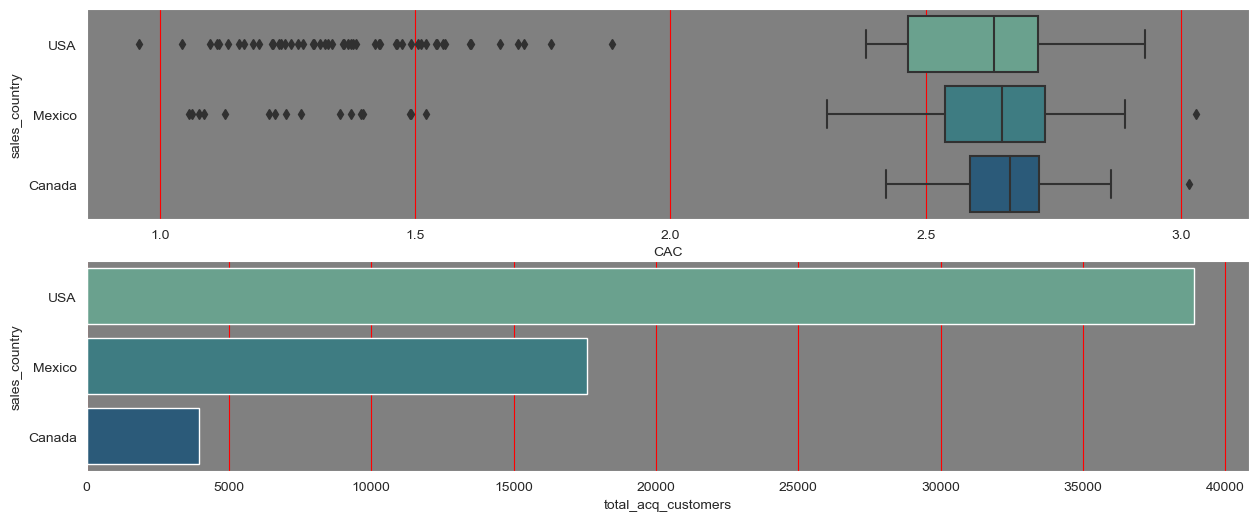

In [16]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1,facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            y='sales_country',
            x='CAC',
            palette='crest')

plt.subplot(2,1,2,facecolor='grey')
pd_df = strlvl_promo_info.groupby(
                ['sales_country']
                ).agg(
                 total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
                ).reset_index().sort_values('sales_country', ascending=False)

sns.barplot(data=pd_df,
            y='sales_country',
            x='total_acq_customers',
            palette='crest')
plt.show()

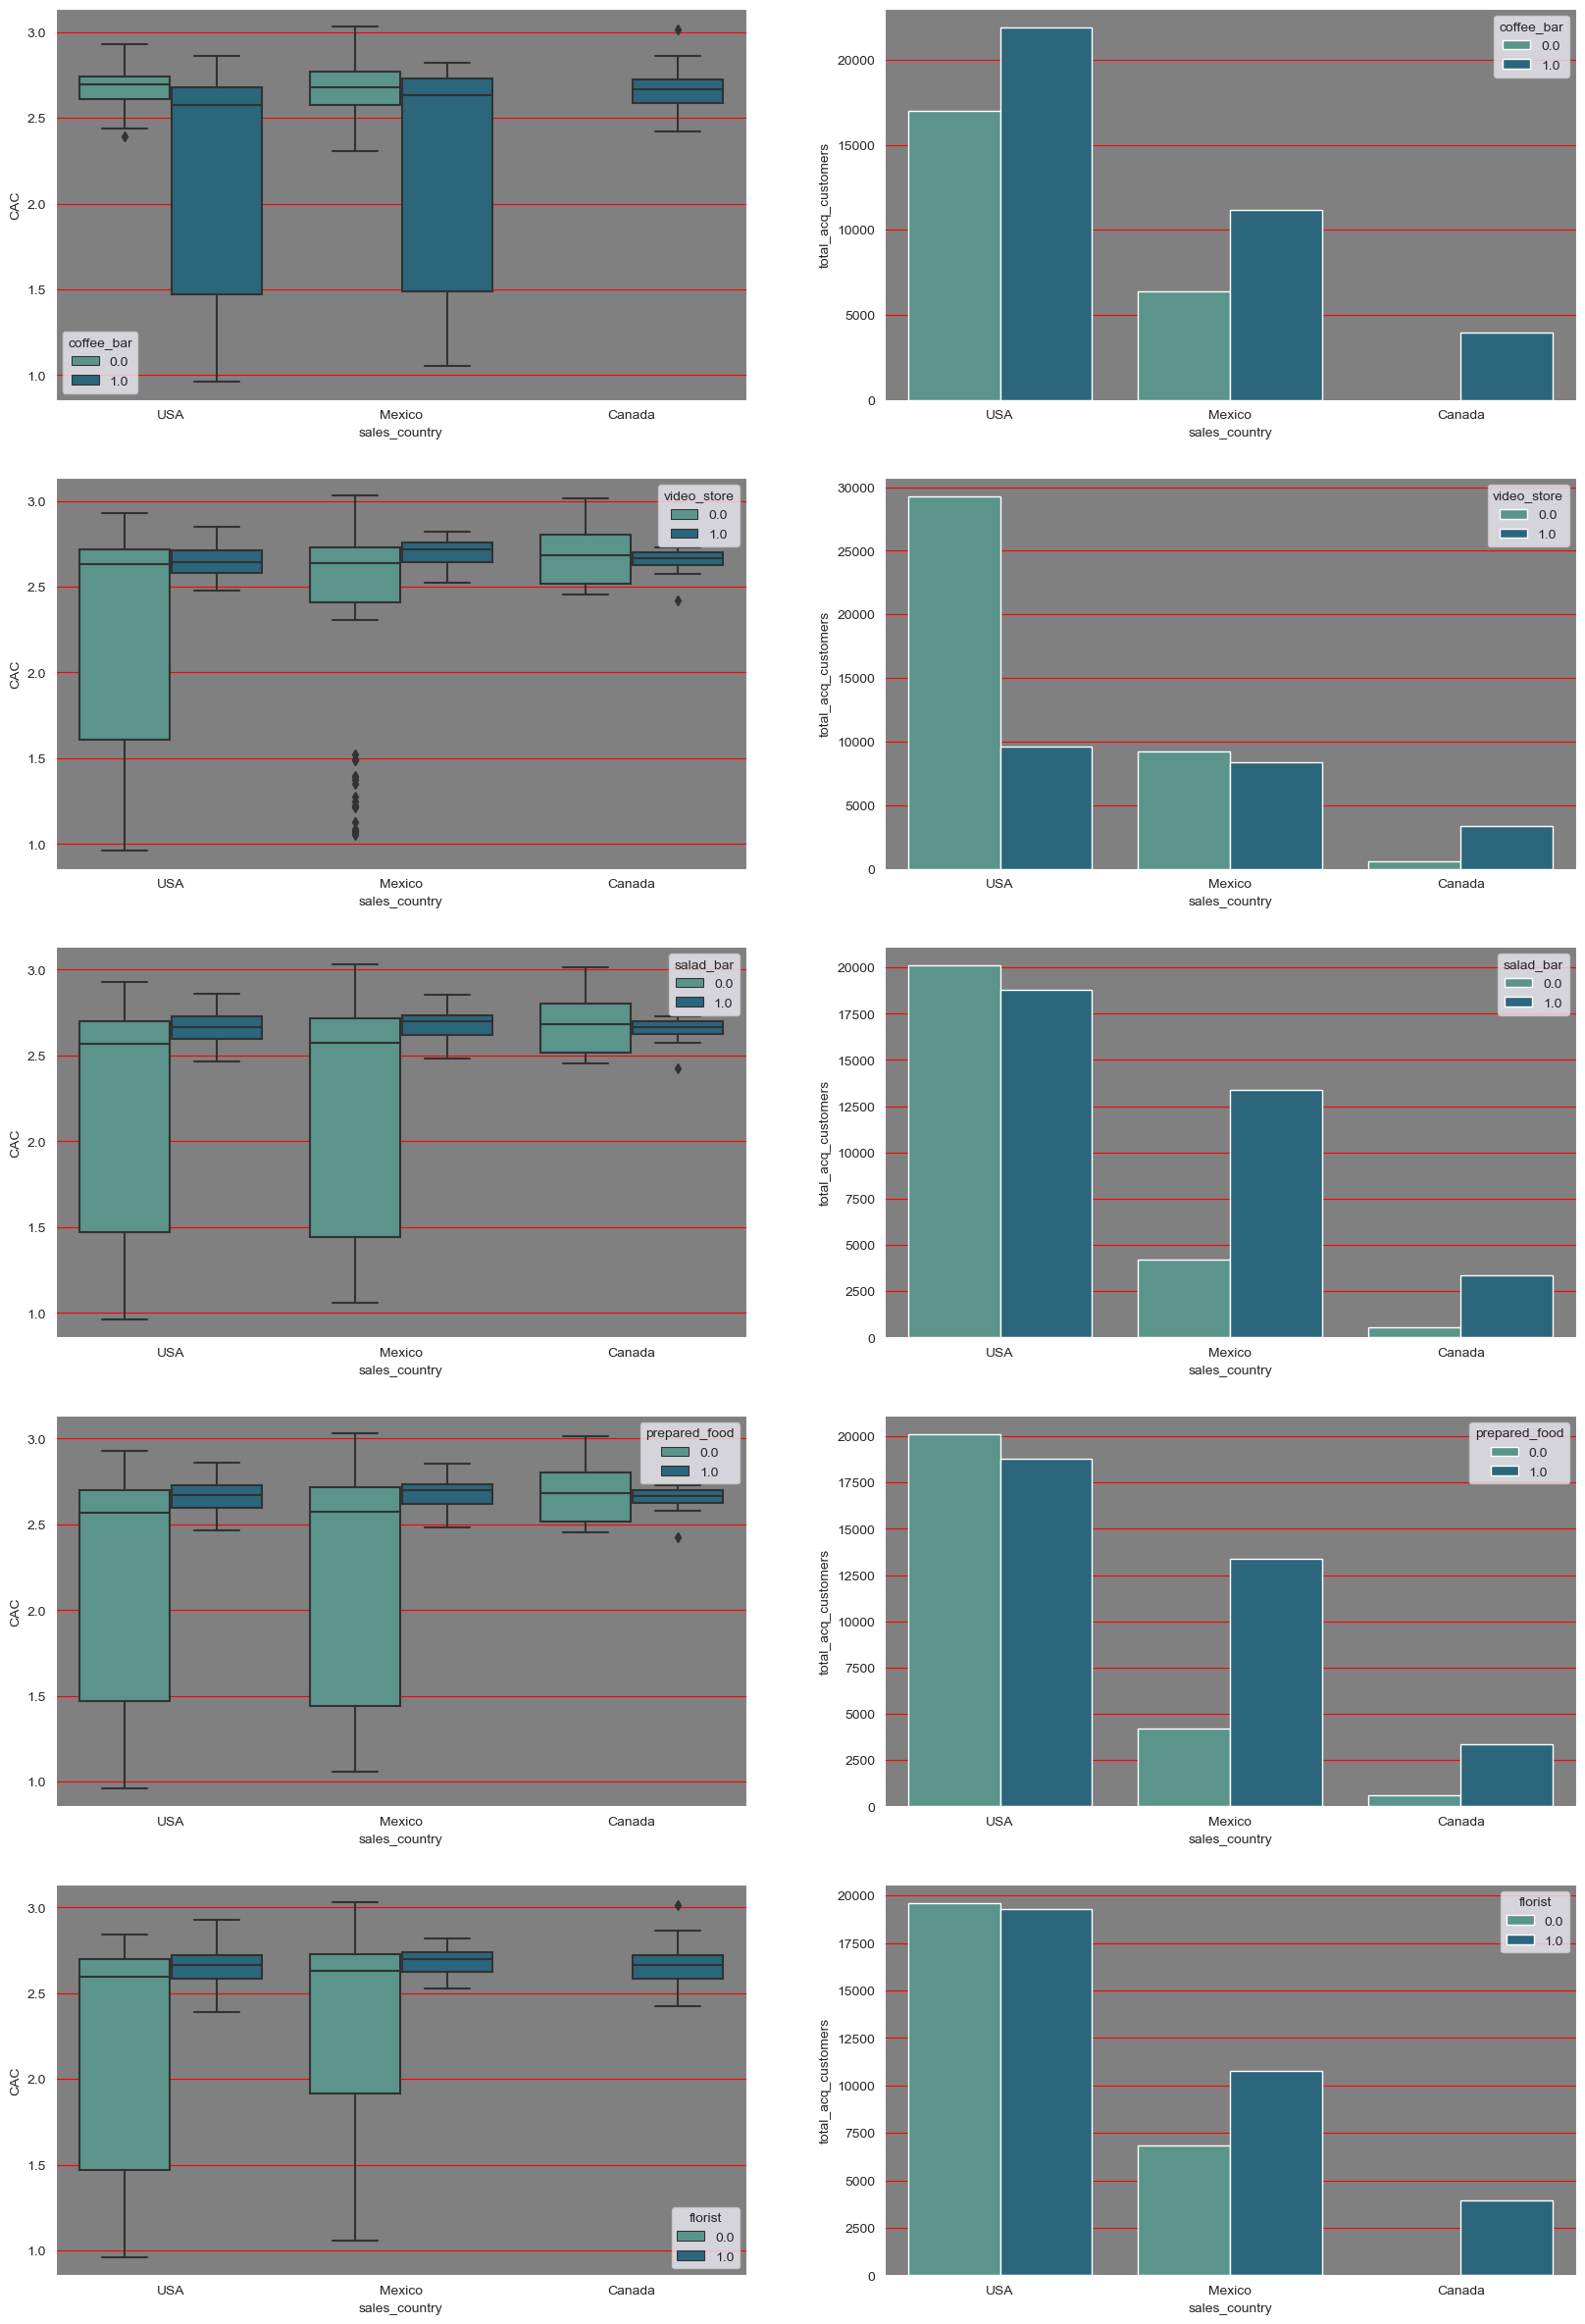

In [17]:
plt.figure(figsize=(20,30))
plt.subplot(5,2,1, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='coffee_bar',
             palette='crest')
pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'coffee_bar']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)
plt.subplot(5,2,2, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='coffee_bar',
            palette='crest')

plt.subplot(5,2,3, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             x='sales_country',
             y='CAC',
             hue='video_store',
             palette='crest')
pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'video_store']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,4, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='video_store',
            palette='crest')

plt.subplot(5,2,5, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='salad_bar',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'salad_bar']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,6, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='salad_bar',
            palette='crest')


plt.subplot(5,2,7, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='prepared_food',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'prepared_food']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,8, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='prepared_food',
            palette='crest')


plt.subplot(5,2,9, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
             y='CAC',
             x='sales_country',
             hue='florist',
             palette='crest')

pd_df = strlvl_promo_info.groupby(
             ['sales_country',
              'florist']
            ).agg(total_acq_customers = pd.NamedAgg(
                                        'total_acq_customers', 'sum')
                                        ).reset_index().sort_values('sales_country',ascending=False)

plt.subplot(5,2,10, facecolor='grey')
sns.barplot(data=pd_df,
            x='sales_country',
            y='total_acq_customers',
            hue='florist',
            palette='crest')

plt.show()

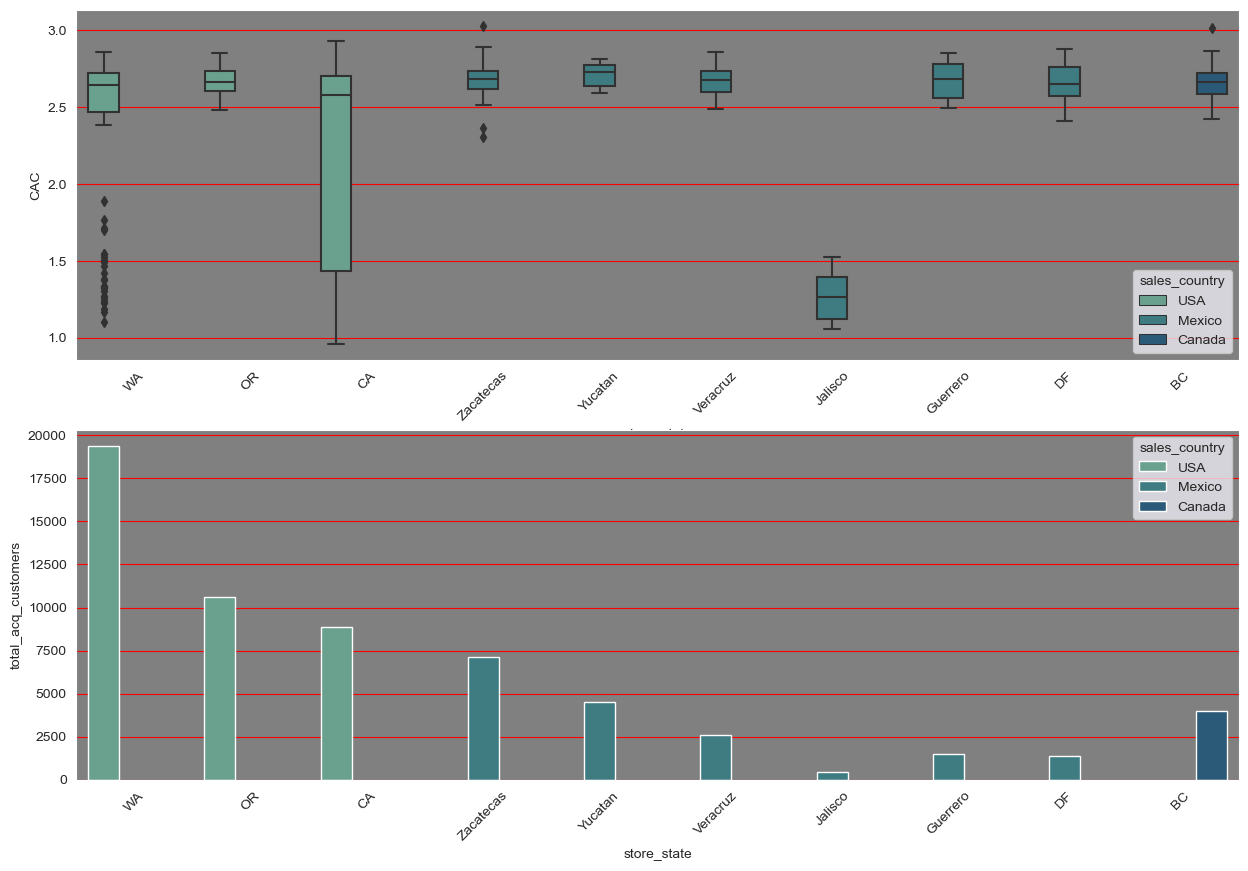

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            x='store_state',
            y='CAC',
            hue='sales_country',
            palette='crest')
plt.xticks(rotation='45')

plt.subplot(2,1,2, facecolor='grey')
pd_df = strlvl_promo_info.groupby(
            ['sales_country',
             'store_state']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
        ).reset_index().sort_values(
                        ['sales_country',
                         'store_state'], 
                         ascending=[False,False])

sns.barplot(data=pd_df,
            x='store_state',
            y='total_acq_customers',
            hue='sales_country',
            palette='crest',
            ci=None)
plt.xticks(rotation='45')
plt.show()

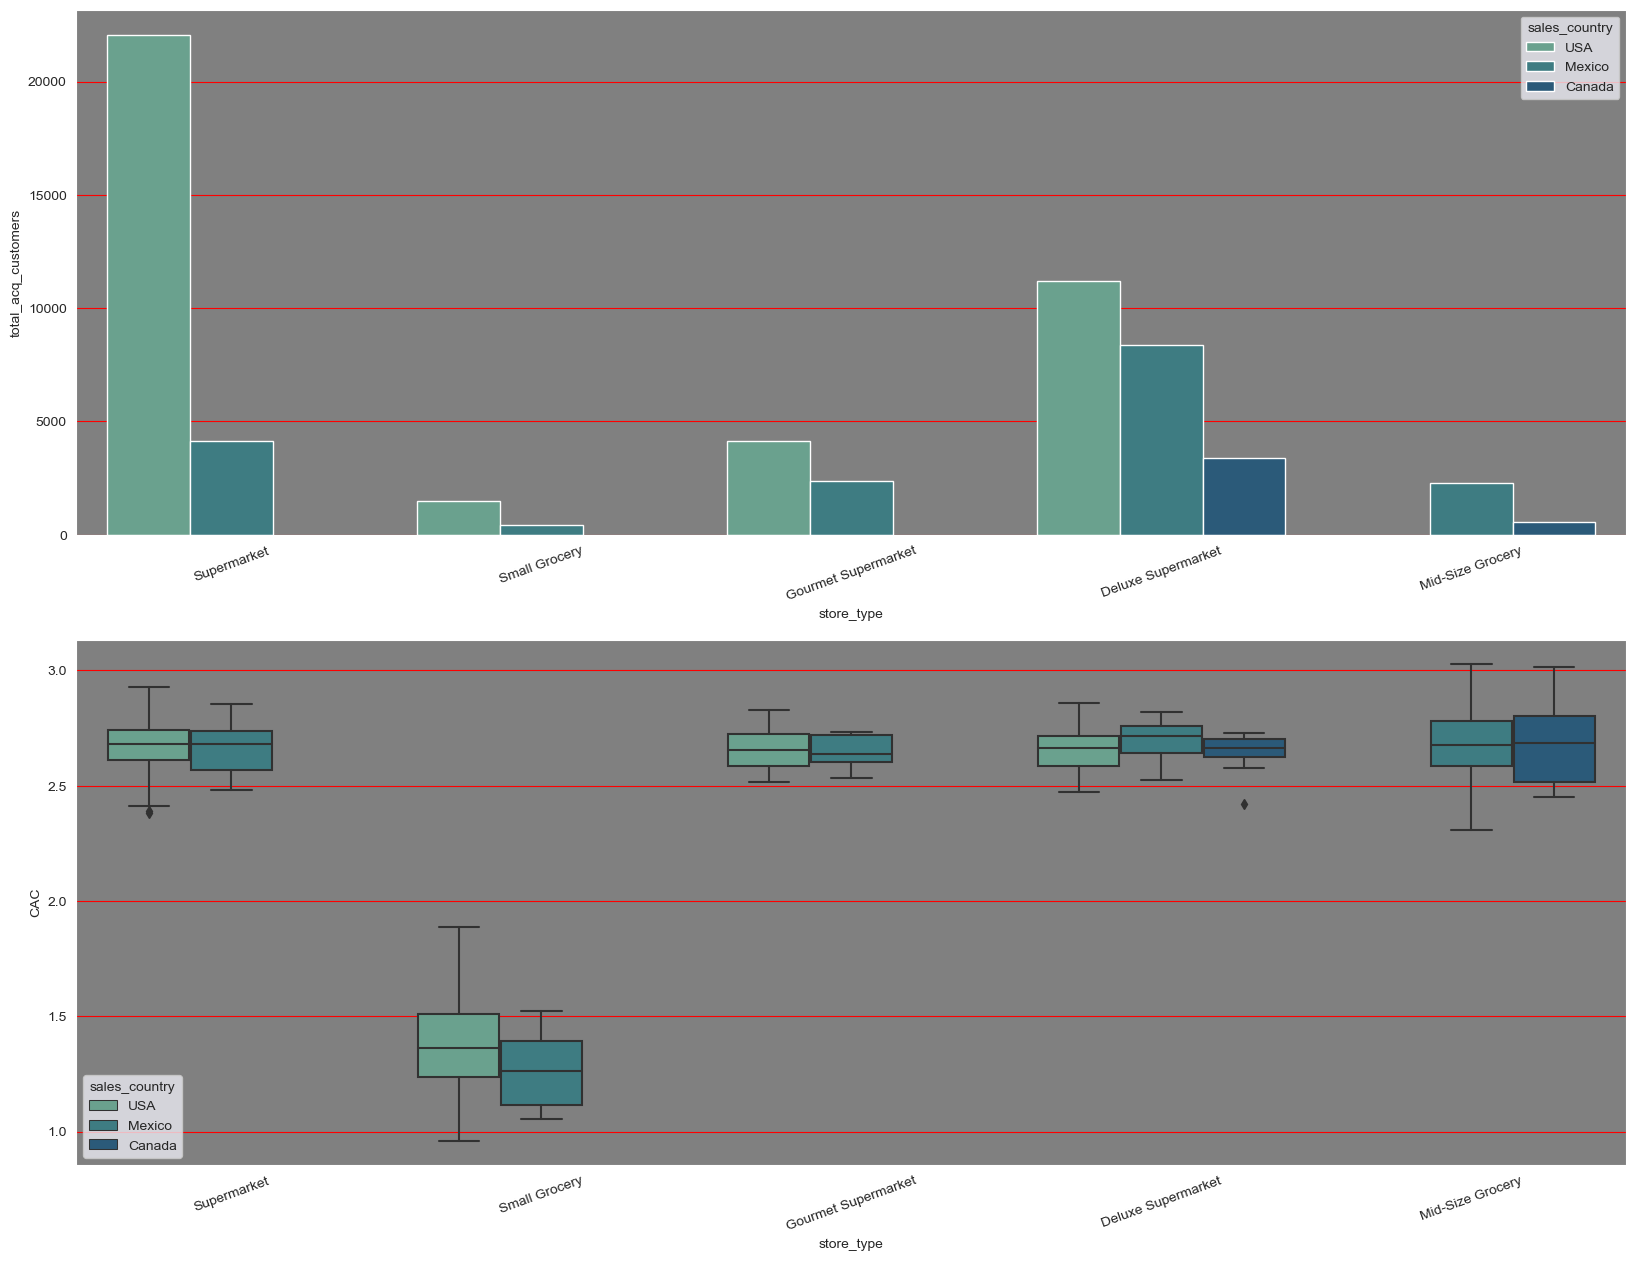

In [19]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1, facecolor='grey')

pd_df = strlvl_promo_info.groupby(
                ['sales_country','store_type']
            ).agg(
                total_acq_customers = pd.NamedAgg('total_acq_customers', 'sum')
            ).reset_index().sort_values(
                                ['sales_country',
                                 'store_type'],
                                 ascending=[False, False]
                            )

sns.barplot(data=pd_df,
            x='store_type',
            y='total_acq_customers',
            hue='sales_country',
            palette='crest',
            ci=None)
plt.xticks(rotation='20')

plt.subplot(2,1,2, facecolor='grey')
sns.boxplot(data=strlvl_promo_info,
            x='store_type',
            y='CAC',
            hue='sales_country',
            order=['Supermarket',
                       'Small Grocery',
                       'Gourmet Supermarket',
                       'Deluxe Supermarket',
                       'Mid-Size Grocery'],
            palette='crest')
plt.xticks(rotation='20')

plt.show()

In [20]:
pd_df = strlvl_promo_info.groupby(
            ['promotion_name']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='promotion_name',
                      values='total_acq_customers',
                      hole=0.6,
#                      title='% Customers acquired',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=900,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="right", x=1.5)
                           )
#plt.show()

In [21]:
pd_df = strlvl_promo_info.groupby(
            ['promotion_name']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

#x = pd_df['promotion_name'].to_list()
fig = px.box(strlvl_promo_info,
             y='CAC',
             x='promotion_name',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=600,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.promotion_name)

fig.show()

In [22]:
pd_df = strlvl_promo_info.groupby(
            ['media_type'
            ]
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

division_rat = px.pie(pd_df,
                      names='media_type',
                      values='total_acq_customers',
                      hole=0.5,
#                      title='% Customers acquired',
                      color_discrete_sequence=px.colors.qualitative.Prism)
division_rat.update_traces(textfont=dict(color='#fff'))
division_rat.update_layout(autosize=True,
                           height=600,
                           width=930,
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                           font=dict(color='#8a8d93'),
                           legend=dict(orientation="h", yanchor="bottom", y=1.2, xanchor="right", x=1.5)
                           )


In [23]:
pd_df = strlvl_promo_info.groupby(
            ['media_type']
        ).agg(
            total_acq_customers = pd.NamedAgg('total_acq_customers','sum')
        ).reset_index().sort_values(
                        'total_acq_customers',
                        ascending=False)

#x = pd_df['promotion_name'].to_list()
fig = px.box(strlvl_promo_info,
             y='CAC',
             x='media_type',
             color_discrete_sequence=px.colors.qualitative.Safe
            )

fig.update_traces(quartilemethod="inclusive") # or "inclusive", or "linear" by default
fig.update_layout(autosize=True,
                           height=600,
                           width=930,
                           margin=dict(t=30, b=20, l=20, r=20),
                           plot_bgcolor='#2d3035',
                           paper_bgcolor='#2d3035',
                           font=dict(color='#8a8d93')
                           )
fig.update_xaxes(categoryorder='array', categoryarray= pd_df.media_type)

fig.show()

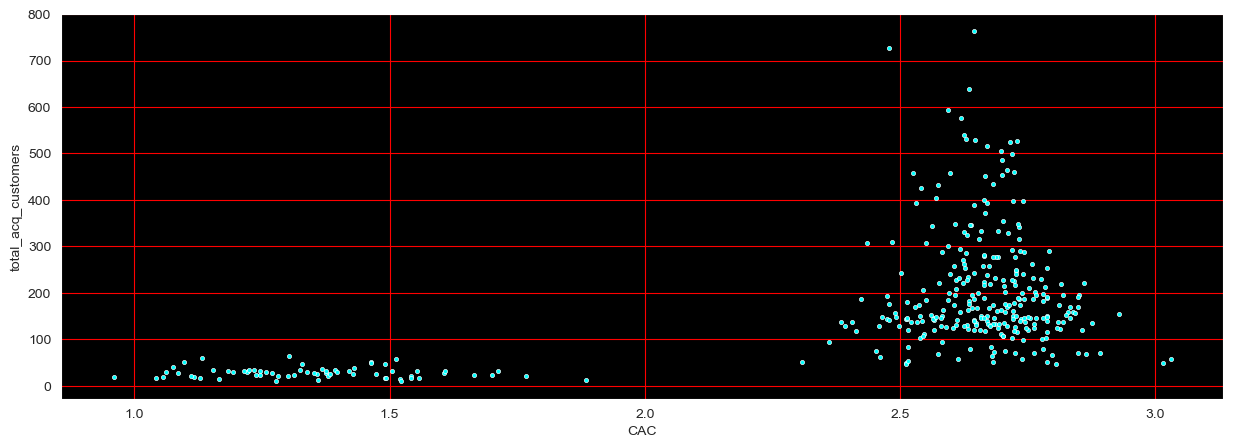

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(facecolor='black')
sns.scatterplot(data=strlvl_promo_info,
                y='total_acq_customers',
                x='CAC',
                color='cyan',
                marker='.')
plt.show()

In [25]:
#Food Level

In [26]:
foodlvl_promo_info = df.groupby(['sales_country',
                    'food_family',
                    'food_department',
                    'food_category', 
                    'promotion_name',
                    'media_type',
                    'cost']).agg(
                        total_acq_customers = pd.NamedAgg('gender', 'count'),
                        total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                        total_store_sales = pd.NamedAgg('store_sales','sum'),
                        total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                        total_acq_cost = pd.NamedAgg('cost', 'sum')
                    ).reset_index().sort_values(
                                    ['sales_country',
                                    'food_family',
                                    'food_department',
                                    'food_category',
                                    'promotion_name',
                                    'media_type'],ascending=False
                                    )

foodlvl_promo_info['CAC'] = ( foodlvl_promo_info['total_store_cost'] + \
                             foodlvl_promo_info['total_acq_cost']/1000000 \
                           ) / foodlvl_promo_info['total_acq_customers']

In [27]:
foodlvl_promo_info.head()

,sales_country,food_family,food_department,food_category,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
12946,USA,Non-Consumable,Periodicals,Magazines,You Save Days,TV,108.22,1,3.0,6.45,2.8380,108.22,2.838108
12945,USA,Non-Consumable,Periodicals,Magazines,You Save Days,Sunday Paper,51.27,4,9.0,21.44,8.6850,205.08,2.171301
12944,USA,Non-Consumable,Periodicals,Magazines,You Save Days,In-Store Coupon,95.25,3,5.0,5.68,2.3528,285.75,0.784362
12943,USA,Non-Consumable,Periodicals,Magazines,You Save Days,Bulk Mail,131.81,10,30.0,50.88,19.8817,1318.10,1.988302
12942,USA,Non-Consumable,Periodicals,Magazines,Weekend Markdown,"Sunday Paper, Radio, TV",67.51,1,1.0,2.85,0.9975,67.51,0.997568


In [28]:
#Customer Level

In [29]:
genderlvl_promo_info = df.groupby(['gender',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['gender',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

genderlvl_promo_info['CAC'] = ( genderlvl_promo_info['total_store_cost'] + \
                             genderlvl_promo_info['total_acq_cost']/1000000 \
                           ) / genderlvl_promo_info['total_acq_customers']

In [30]:
genderlvl_promo_info.head()

,gender,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,F,Bag Stuffers,Daily Paper,70.32,135,421.0,954.93,379.9735,9493.20,2.814689
1,F,Bag Stuffers,"Daily Paper, Radio",117.93,6,14.0,23.18,8.6238,707.58,1.437418
2,F,Bag Stuffers,"Daily Paper, Radio",126.62,273,852.0,1776.63,707.6857,34567.26,2.592382
3,F,Bag Stuffers,Product Attachment,82.62,92,288.0,639.80,256.4033,7601.04,2.787075
4,F,Bag Stuffers,Street Handout,123.79,27,45.0,94.33,39.3389,3342.33,1.457120


In [31]:
maritallvl_promo_info = df.groupby(['marital_status',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['marital_status',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

maritallvl_promo_info['CAC'] = ( maritallvl_promo_info['total_store_cost'] + \
                             maritallvl_promo_info['total_acq_cost']/1000000 \
                           ) / maritallvl_promo_info['total_acq_customers']

In [32]:
maritallvl_promo_info.head()

,marital_status,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,M,Bag Stuffers,Daily Paper,70.32,100,310.0,706.81,284.6242,7032.00,2.846312
1,M,Bag Stuffers,"Daily Paper, Radio",117.93,8,17.0,26.41,10.0231,943.44,1.253005
2,M,Bag Stuffers,"Daily Paper, Radio",126.62,269,831.0,1741.66,698.8640,34060.78,2.598134
3,M,Bag Stuffers,Product Attachment,82.62,86,264.0,554.34,219.6478,7105.32,2.554127
4,M,Bag Stuffers,Street Handout,123.79,3,6.0,8.54,3.6110,371.37,1.203790


In [33]:
totalchildrenlvl_promo_info = df.groupby(['total_children',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['total_children',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

totalchildrenlvl_promo_info['CAC'] = ( totalchildrenlvl_promo_info['total_store_cost'] + \
                             totalchildrenlvl_promo_info['total_acq_cost']/1000000 \
                           ) / totalchildrenlvl_promo_info['total_acq_customers']

In [34]:
totalchildrenlvl_promo_info.head()

,total_children,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,0.0,Bag Stuffers,Daily Paper,70.32,9,29.0,64.61,26.0134,632.88,2.890448
1,0.0,Bag Stuffers,"Daily Paper, Radio",117.93,3,6.0,10.66,3.5652,353.79,1.188518
2,0.0,Bag Stuffers,"Daily Paper, Radio",126.62,66,200.0,433.72,169.4428,8356.92,2.567442
3,0.0,Bag Stuffers,Product Attachment,82.62,23,70.0,146.23,60.0912,1900.26,2.612743
4,0.0,Bag Stuffers,Street Handout,123.79,3,6.0,8.54,3.6110,371.37,1.203790


In [35]:
educationlvl_promo_info = df.groupby(['education',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['education',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

educationlvl_promo_info['CAC'] = ( educationlvl_promo_info['total_store_cost'] + \
                             educationlvl_promo_info['total_acq_cost']/1000000 \
                           ) / educationlvl_promo_info['total_acq_customers']

In [36]:
educationlvl_promo_info.head()

,education,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,Bachelors Degree,Bag Stuffers,Daily Paper,70.32,51,168.0,387.82,156.4672,3586.32,3.068055
1,Bachelors Degree,Bag Stuffers,"Daily Paper, Radio",117.93,7,13.0,25.53,9.3139,825.51,1.330675
2,Bachelors Degree,Bag Stuffers,"Daily Paper, Radio",126.62,147,453.0,975.08,393.2195,18613.14,2.675089
3,Bachelors Degree,Bag Stuffers,Product Attachment,82.62,60,188.0,384.60,154.7507,4957.20,2.579261
4,Bachelors Degree,Best Savings,Cash Register Handout,110.17,65,201.0,405.68,166.9585,7161.05,2.568702


In [37]:
membercardlvl_promo_info = df.groupby(['member_card',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['member_card',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

membercardlvl_promo_info['CAC'] = ( membercardlvl_promo_info['total_store_cost'] + \
                             membercardlvl_promo_info['total_acq_cost']/1000000 \
                           ) / membercardlvl_promo_info['total_acq_customers']

In [38]:
membercardlvl_promo_info.head()

,member_card,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,Bronze,Bag Stuffers,Daily Paper,70.32,140,448.0,983.70,401.3544,9844.80,2.866887
1,Bronze,Bag Stuffers,"Daily Paper, Radio",117.93,5,10.0,22.30,7.9146,589.65,1.583038
2,Bronze,Bag Stuffers,"Daily Paper, Radio",126.62,275,847.0,1801.77,712.6193,34820.50,2.591470
3,Bronze,Bag Stuffers,Product Attachment,82.62,124,385.0,784.27,310.7733,10244.88,2.506319
4,Bronze,Bag Stuffers,Street Handout,123.79,13,21.0,39.63,16.4357,1609.27,1.264408


In [39]:
occupationlvl_promo_info = df.groupby(['occupation',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['occupation',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

occupationlvl_promo_info['CAC'] = ( occupationlvl_promo_info['total_store_cost'] + \
                             occupationlvl_promo_info['total_acq_cost']/1000000 \
                           ) / occupationlvl_promo_info['total_acq_customers']

In [40]:
occupationlvl_promo_info.head()

,occupation,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,Clerical,Bag Stuffers,Product Attachment,82.62,3,10.0,21.29,7.2411,247.86,2.413783
1,Clerical,Best Savings,"Daily Paper, Radio, TV",53.82,3,8.0,27.85,11.0859,161.46,3.695354
2,Clerical,Best Savings,Street Handout,114.01,6,24.0,50.70,18.9292,684.06,3.154981
3,Clerical,Big Promo,Cash Register Handout,77.70,4,8.0,23.82,9.4024,310.80,2.350678
4,Clerical,Big Promo,"Sunday Paper, Radio, TV",117.04,6,24.0,34.34,15.4340,702.24,2.572450


In [41]:
houseownerlvl_promo_info = df.groupby(['houseowner',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['houseowner',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

houseownerlvl_promo_info['CAC'] = ( houseownerlvl_promo_info['total_store_cost'] + \
                             houseownerlvl_promo_info['total_acq_cost']/1000000 \
                           ) / houseownerlvl_promo_info['total_acq_customers']

In [42]:
houseownerlvl_promo_info.head()

,houseowner,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,N,Bag Stuffers,Daily Paper,70.32,94,309.0,663.91,266.6499,6610.08,2.836771
1,N,Bag Stuffers,"Daily Paper, Radio",117.93,16,31.0,58.69,23.8061,1886.88,1.487999
2,N,Bag Stuffers,"Daily Paper, Radio",126.62,267,836.0,1756.00,697.8180,33807.54,2.613677
3,N,Bag Stuffers,Product Attachment,82.62,85,267.0,513.54,200.5130,7022.70,2.359059
4,N,Bag Stuffers,Street Handout,123.79,11,17.0,32.34,13.0093,1361.69,1.182787


In [43]:
carslvl_promo_info = df.groupby(['avg_cars_at_home',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['avg_cars_at_home',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

carslvl_promo_info['CAC'] = ( carslvl_promo_info['total_store_cost'] + \
                             carslvl_promo_info['total_acq_cost']/1000000 \
                           ) / carslvl_promo_info['total_acq_customers']

In [44]:
carslvl_promo_info.head()

,avg_cars_at_home,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,0.0,Bag Stuffers,Daily Paper,70.32,4,12.0,14.68,5.4890,281.28,1.372320
1,0.0,Bag Stuffers,"Daily Paper, Radio",126.62,34,105.0,223.93,90.0494,4305.08,2.648638
2,0.0,Bag Stuffers,Product Attachment,82.62,21,67.0,136.53,55.7785,1735.02,2.656202
3,0.0,Bag Stuffers,Street Handout,123.79,6,10.0,18.56,7.1836,742.74,1.197390
4,0.0,Best Savings,Cash Register Handout,110.17,21,62.0,117.22,45.8509,2313.57,2.183486


In [45]:
incomelvl_promo_info = df.groupby(['avg. yearly_income',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['avg. yearly_income',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

incomelvl_promo_info['CAC'] = ( incomelvl_promo_info['total_store_cost'] + \
                             incomelvl_promo_info['total_acq_cost']/1000000 \
                           ) / incomelvl_promo_info['total_acq_customers']

In [46]:
incomelvl_promo_info.head()

,avg. yearly_income,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,$10K - $30K,Bag Stuffers,Daily Paper,70.32,29,92.0,189.36,73.8589,2039.28,2.546929
1,$10K - $30K,Bag Stuffers,"Daily Paper, Radio",117.93,4,9.0,20.83,9.8495,471.72,2.462493
2,$10K - $30K,Bag Stuffers,"Daily Paper, Radio",126.62,155,482.0,987.39,386.2931,19626.10,2.492340
3,$10K - $30K,Bag Stuffers,Product Attachment,82.62,32,100.0,227.33,92.0117,2643.84,2.875448
4,$10K - $30K,Bag Stuffers,Street Handout,123.79,22,37.0,77.02,32.3399,2723.38,1.470119


In [47]:
childrenathomelvl_promo_info = df.groupby(['num_children_at_home',
                                'promotion_name',
                                'media_type',
                                'cost']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                            ['num_children_at_home',
                                                             'promotion_name',
                                                             'media_type']
                                                        )

childrenathomelvl_promo_info['CAC'] = ( childrenathomelvl_promo_info['total_store_cost'] + \
                             childrenathomelvl_promo_info['total_acq_cost']/1000000 \
                           ) / childrenathomelvl_promo_info['total_acq_customers']

In [48]:
childrenathomelvl_promo_info.head()

,num_children_at_home,promotion_name,media_type,cost,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,0.0,Bag Stuffers,Daily Paper,70.32,139,453.0,993.55,401.5123,9774.48,2.888648
1,0.0,Bag Stuffers,"Daily Paper, Radio",117.93,14,25.0,58.79,23.8811,1651.02,1.705911
2,0.0,Bag Stuffers,"Daily Paper, Radio",126.62,383,1180.0,2499.40,991.2653,48495.46,2.588287
3,0.0,Bag Stuffers,Product Attachment,82.62,147,471.0,999.16,400.1774,12145.14,2.722378
4,0.0,Bag Stuffers,Street Handout,123.79,35,58.0,116.65,48.7756,4332.65,1.393712


In [49]:
#Product Level

In [50]:
productlvl_info = df.groupby(['sales_country',
                            'brand_name',
                            'SRP',
                            'gross_weight',
                            'net_weight',
                            'recyclable_package',
                            'low_fat',
                            'units_per_case']).agg(
                                            total_acq_customers = pd.NamedAgg('member_card', 'count'),
                                            total_units_sold = pd.NamedAgg('unit_sales', 'sum'),
                                            total_store_sales = pd.NamedAgg('store_sales','sum'),
                                            total_store_cost = pd.NamedAgg('store_cost', 'sum'),
                                            total_acq_cost = pd.NamedAgg('cost', 'sum')
                                        ).reset_index().sort_values(
                                                                    ['sales_country',
                                                                     'brand_name',
                                                                     'SRP',
                                                                     'net_weight',
                                                                     'recyclable_package',
                                                                     'low_fat',
                                                                     'units_per_case']
                                                                    )

productlvl_info['CAC'] = ( productlvl_info['total_store_cost'] + \
                             productlvl_info['total_acq_cost']/1000000 \
                           ) / productlvl_info['total_acq_customers']

In [51]:
productlvl_info.head()

,sales_country,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,total_acq_customers,total_units_sold,total_store_sales,total_store_cost,total_acq_cost,CAC
0,Canada,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,3,10.0,27.60,10.2948,323.78,3.431708
1,Canada,Akron,1.74,8.24,6.23,0.0,0.0,18.0,5,18.0,31.32,10.9272,497.18,2.185539
2,Canada,Akron,1.76,11.40,10.30,1.0,0.0,19.0,1,2.0,3.52,1.1616,122.77,1.161723
3,Canada,American,0.59,7.32,5.32,1.0,0.0,24.0,5,16.0,9.44,3.6816,558.01,0.736432
4,Canada,American,0.78,14.20,11.10,1.0,0.0,19.0,3,9.0,7.02,2.7846,201.34,0.928267
